In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# simon task daten einlesen
file_path = "log.txt" 

simon_data = pd.read_csv(file_path, sep=r"\s+", header=None, names=["side", "response", "condition", "error", "reaction_time"])
simon_data.head()

,side,response,condition,error,reaction_time
0,left,rightresponse,incompatible,1,364
1,right,rightresponse,compatible,1,364
2,right,leftresponse,incompatible,1,375
3,right,rightresponse,incompatible,2,384
4,right,leftresponse,incompatible,1,278


In [5]:
compatible_simon_data = simon_data[simon_data['condition'] == 'compatible']
compatible_simon_data_success = compatible_simon_data[compatible_simon_data["error"] == 1]
compatible_simon_data_success = compatible_simon_data_success["reaction_time"]
compatible_simon_data_total = len(compatible_simon_data)
compatible_simon_data_failed = len(compatible_simon_data[compatible_simon_data["error"] == 2])
compatible_simon_error_rate = compatible_simon_data_failed / compatible_simon_data_total * 100

incompatible_simon_data = simon_data[simon_data['condition'] == 'incompatible']
incompatible_simon_data_success = incompatible_simon_data[incompatible_simon_data["error"] == 1]
incompatible_simon_data_success = incompatible_simon_data_success["reaction_time"]
incompatible_simon_data_total = len(incompatible_simon_data)
incompatible_simon_data_failed = len(incompatible_simon_data[incompatible_simon_data["error"] == 2])
incompatible_simon_error_rate = incompatible_simon_data_failed / incompatible_simon_data_total * 100

print(f"Compatible Condition Error Rate: {compatible_simon_error_rate:.2f}%")
print(f"Incompatible Condition Error Rate: {incompatible_simon_error_rate:.2f}%")


Compatible Condition Error Rate: 18.22%
Incompatible Condition Error Rate: 20.00%


In [11]:
# Parameter der Simulation
n_simulationen = 50  # Anzahl der Monte-Carlo-Läufe

In [12]:
reaction_time_compatible = np.random.choice(compatible_simon_data_success, size=n_simulationen, replace=True)
reaction_time_incompatible = np.random.choice(compatible_simon_data_success, size=n_simulationen, replace=True)

In [13]:
compatible_mean_final = np.mean(reaction_time_compatible)
compatible_std_final = np.std(reaction_time_compatible)
incompatible_mean_final = np.mean(reaction_time_incompatible)
incompatible_std_final = np.std(reaction_time_incompatible)
print(f"Compatible - Mittelwert der Gesamtverzögerung: {compatible_mean_final:.2f} ms")
print(f"Compatible - Standardabweichung der Gesamtverzögerung: {compatible_std_final:.2f} ms")
print(f"Incompatible - Mittelwert der Gesamtverzögerung: {incompatible_mean_final:.2f} ms")
print(f"Incompatible - Standardabweichung der Gesamtverzögerung: {incompatible_std_final:.2f} ms")

Compatible - Mittelwert der Gesamtverzögerung: 375.84 ms
Compatible - Standardabweichung der Gesamtverzögerung: 98.41 ms
Incompatible - Mittelwert der Gesamtverzögerung: 377.14 ms
Incompatible - Standardabweichung der Gesamtverzögerung: 110.41 ms


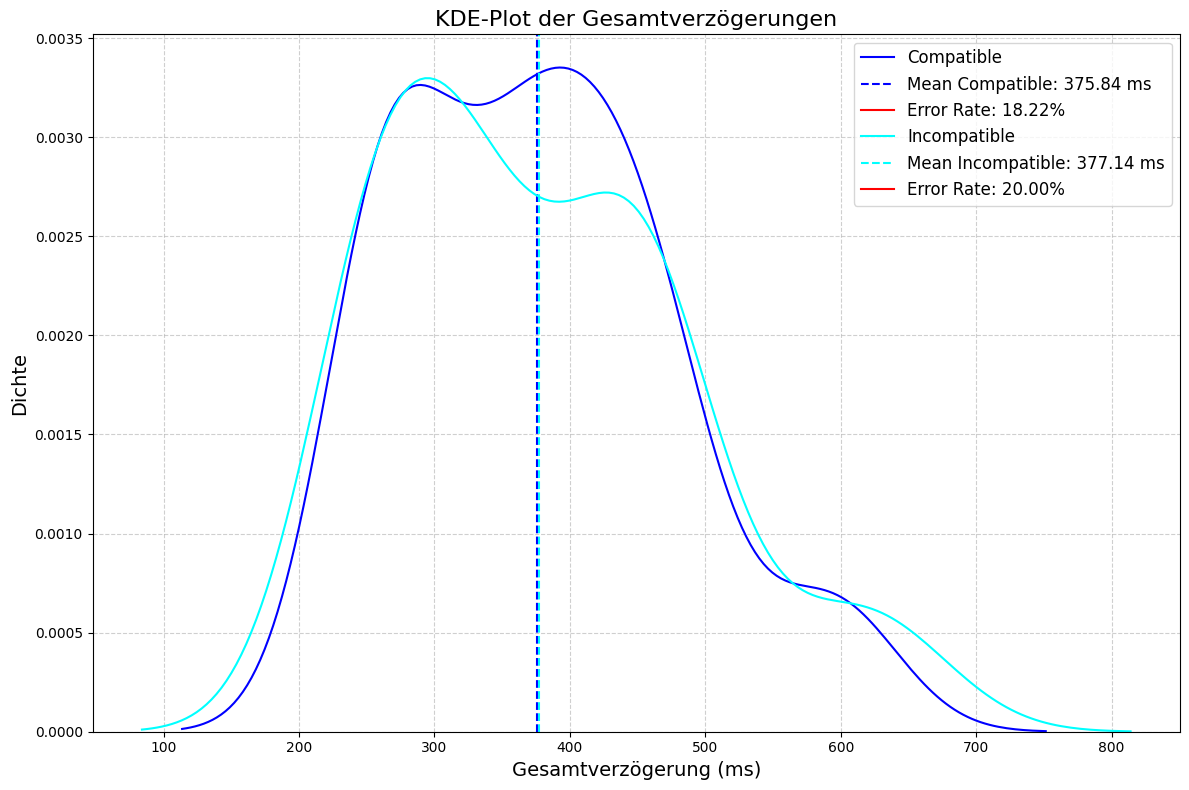

In [14]:
# KDE-Plot erstellen
plt.figure(figsize=(12, 8))

# KDE für Gaming Keyboard (compatible)
sns.kdeplot(reaction_time_compatible, label="Compatible", color='blue')
plt.axvline(np.mean(reaction_time_compatible), color='blue', linestyle='--', label=f"Mean Compatible: {compatible_mean_final:.2f} ms")

plt.plot([], [], color='red', label=f"Error Rate: {compatible_simon_error_rate:.2f}%")

# KDE für Gaming Keyboard (incompatible)
sns.kdeplot(reaction_time_incompatible, label="Incompatible", color='cyan')
plt.axvline(np.mean(reaction_time_incompatible), color='cyan', linestyle='--', label=f"Mean Incompatible: {incompatible_mean_final:.2f} ms")

plt.plot([], [], color='red', label=f"Error Rate: {incompatible_simon_error_rate:.2f}%")

# plt.axvspan(gk_compatible_mean_final - gk_compatible_std_final, gk_compatible_mean_final + gk_compatible_std_final, color='green', alpha=0.2, label="±1 Std Dev (GK Compatible)")

# Achsentitel und Legende
plt.title("KDE-Plot der Gesamtverzögerungen", fontsize=16)
plt.xlabel("Gesamtverzögerung (ms)", fontsize=14)
plt.ylabel("Dichte", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Plot anzeigen
plt.tight_layout()
plt.show()


In [15]:
# Eine höhere Varianz zeigt, dass die Datenpunkte stärker um den Mittelwert streuen, d. h., die Werte liegen weiter voneinander entfernt.
# wurzel davon is Standardabweichung
var_compatible = np.var(reaction_time_compatible)
var_incompatible = np.var(reaction_time_incompatible)

print("comp: " + str(var_compatible))
print("incomp: " + str(var_incompatible))

comp: 9683.8544
incomp: 12189.760399999997
